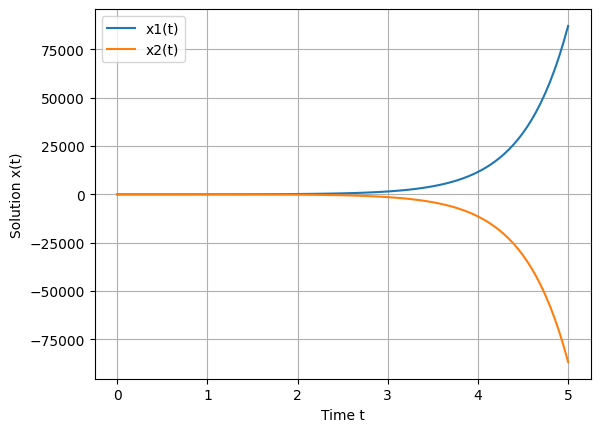

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def system(t, x):
    A = np.array([[4, 2], [-3, -1]])
    b = np.array([2, 1])
    return A @ x + b

# Initial conditions
x0 = np.array([0, 0])

# Time span
t_span = (0, 5)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the system
sol = solve_ivp(system, t_span, x0, t_eval=t_eval)

# Plot the results
plt.plot(sol.t, sol.y[0], label='x1(t)')
plt.plot(sol.t, sol.y[1], label='x2(t)')
plt.xlabel('Time t')
plt.ylabel('Solution x(t)')
plt.legend()
plt.grid()
plt.show()

In [ ]:
import sympy as sp

t = sp.symbols('t')
x = sp.Function('x')(t)
eq = sp.Eq(t**2 * x.diff(t, t) - 3*t * x.diff(t) - 3*x, 0)

print(sp.dsolve(eq, x))


Eq(x(t), C1*t**(2 - sqrt(7)) + C2*t**(2 + sqrt(7)))


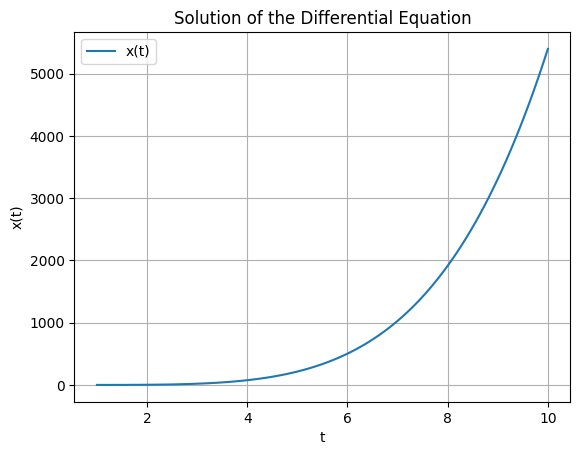

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the second-order differential equation as a system of first-order equations
def system(t, Y):
    x, dx = Y  # Y[0] = x, Y[1] = dx/dt
    ddx = (3*t*dx + 3*x) / t**2  # Rearranged equation for d^2x/dt^2
    return [dx, ddx]

# Define the initial conditions
t_span = (1, 10)  # Time interval (avoiding t=0 to prevent singularity)
t_eval = np.linspace(t_span[0], t_span[1], 100)  # Points at which to evaluate
y0 = [1, 0]  # Initial conditions: x(1) = 1, x'(1) = 0

# Solve the ODE
sol = solve_ivp(system, t_span, y0, t_eval=t_eval, method='RK45')

# Plot the solution
plt.plot(sol.t, sol.y[0], label="x(t)")
plt.xlabel("t")
plt.ylabel("x(t)")
plt.title("Solution of the Differential Equation")
plt.legend()
plt.grid()
plt.show()


C:\Users\huste\AppData\Local\Temp\ipykernel_42716\232693277.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dx_vals = np.array([derivative(func, t, dx=1e-5) for t in t_vals])
C:\Users\huste\AppData\Local\Temp\ipykernel_42716\232693277.py:23: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  ddx_vals = np.array([derivative(func, t, dx=1e-5, n=2) for t in t_vals])


t is NOT in the solution space.
|t| is NOT in the solution space.
t^3 is NOT in the solution space.
|t|^3 is NOT in the solution space.


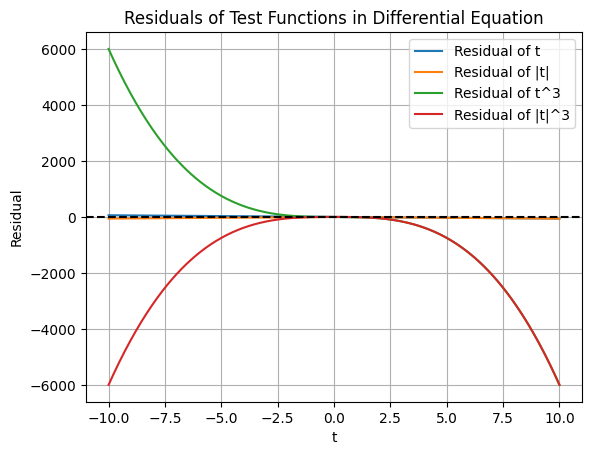

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

# Define the differential equation function
def diff_eq(t, x, dx, ddx):
    return t**2 * ddx - 3*t * dx - 3*x

# Define test functions
def f1(t): return t
def f2(t): return np.abs(t)
def f3(t): return t**3
def f4(t): return np.abs(t)**3

# Define a range of t values (avoiding t=0 to prevent singularity)
t_vals = np.linspace(-10, 10, 500)
t_vals = t_vals[t_vals != 0]  # Remove t=0 to prevent division by zero

# Evaluate functions and their derivatives
for func, name in zip([f1, f2, f3, f4], ["t", "|t|", "t^3", "|t|^3"]):
    x_vals = np.array([func(t) for t in t_vals])
    dx_vals = np.array([derivative(func, t, dx=1e-5) for t in t_vals])
    ddx_vals = np.array([derivative(func, t, dx=1e-5, n=2) for t in t_vals])

    # Compute the differential equation result
    res = diff_eq(t_vals, x_vals, dx_vals, ddx_vals)

    # Check if the function satisfies the equation (approximately zero)
    if np.allclose(res, 0, atol=1e-3):
        print(f"{name} is in the solution space.")
    else:
        print(f"{name} is NOT in the solution space.")

    # Optional: Plot the residuals
    plt.plot(t_vals, res, label=f"Residual of {name}")

# Show the residual plots
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("t")
plt.ylabel("Residual")
plt.title("Residuals of Test Functions in Differential Equation")
plt.legend()
plt.grid()
plt.show()
